<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Measuring the success of MA public school districts</h3> </center>
<center><h4>Ysabelle Kempe, Reshan Fernando, Abby Carr</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

This project explores how qualities of Massachusetts' school districts impact students' access to higher education. Using data from the state's Department of Elementary and Secondary Education, we will examine district-level data concerning teacher salaries, how students are disciplined, demographics, AP testing, and financial expenditures. Along with visualizing and analyzing the correlations between variables, we tested and tuned multiple machine learning regression models on the data. This led to the following conclusions, which will be explained in further detail throughout this report:
INSERT CONCLUSIONS

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem Statement:**

Our project explores access to higher education for students in Massachusetts public schools. Specifically, we want to better understand what qualities make a school district more likely to have higher rates of students who go on to attend college or university. 

Our first objective is to better understand the correlation between school district characteristics and access to higher education within that district. We also sought to compare several supervised machine learning regression models on the data to predict the percentage of students in a district who will attend higher education.

**Significance of the Problem**

Access to higher education is foundational in creating a more equitable society, something our group is quite passionate about. Having a college degree means you have access to a larger number of high-paying jobs and potentially will have a higher quality of life. At the same time, not every public school district is created equal. For example, some may have more funding, better teachers or different disciplinary policies, which could affect students’ likelihood to go to college. 

The insights from this project can be useful for decision makers who are trying to better equip school districts to send students on to higher education. If these decision makers understand the characteristics that most impact access to higher education, they can form regulations and distribute resources in a way most likely to create more equitable public education systems across the state.

**Research Questions**

Given the aforementioned problem and its importance, we set out to tackle the following questions:

Question about relationship between features: Will similar features have the same impact on the accuracy predictions for the regression models we use?
   * **Hypothesis between features:**
   * Hypothesis 1: 
       * Null: There is no correlation between the 'Students Disciplined %' and 'High Needs %' features on the target variable (percent of students attending college or university). 
       * Alternative: There is a correlation between the 'Students Disciplined %' and 'High Needs %' features on the target variable (percent of students attending college or university). 
   

   * **Hypothesis between features:**
   * Hypothesis 2:
       * Null: There is no correlation between the 'Students Disciplined %' and 'Test Taker %' features on the target variable (percent of students attending college or university). 
       * Alternative: There is a correlation between the 'Students Disciplined %' and 'Test Taker %' features on the target variable (percent of students attending college or university). 
   
Question about machine learning algorithms: Which supervised machine learning algorithms will be the most useful and accurate for predicting the percent of students that end up attending college or university? We expect the Ridge regression model to produce a higher accuracy than the other machine learning algorithms, because we believe most of the features in our data will be important in determining the portion of students in a district attending higher education. In part, we expect Ridge to be the best model because we can tune it using the alpha parameter.  
   * **Hypothesis about machine learning algorithms**:
   * Hypothesis 3:
       * Null: There will be no significant difference between the accuracy predictions of any of the regression models that we use.
       * Alternative: Out of all of the regressions that we use, the Ridge  regression model will have the highest accuracy.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

   We obtained our data from the website for the Massachusetts Department of Education. Mass DoE creates detailed state reports of school district data, concerning topics such as student enrollment and educator data. The link to the original source is here: 
    https://profiles.doe.mass.edu/state_report/
    
   We chose to use data over five school years (Fall 2013 - Spring 2018) in order to give our machine learning model as much data as possible. We chose to use eight different state reports for each year. Each school district has a unique district code, which is used as the identifier in each report, allowing us to merge these Excel files together on these unique codes. 
   
   Each state report contained many different columns, so we picked columns that we felt would be the most relevant. We also did have to drop some columns due to the availability of what was recorded each year.
   
   The resulting dataset has 1,174 rows and 31 columns. We later selected eight columns (seven features plus our target) that we wanted to work with for the machine learning portion of the project. This is because we removed the variables that were directly correlated with other variables, in order to reduce repetition in our data. We discuss dropped columns later on in more detail. 

   #### Reports Chosen and Columns Used
   - <a href = https://profiles.doe.mass.edu/statereport/gradsattendingcollege.aspx>Grads Attending Higher Ed</a>: 
       - Attending College/University (%) (this is the **outcome**): The percentage of high school graduates attending an institution of higher education. The types include private two-year, private four-year, public two-year, and public four year institutions.
   - <a href= https://profiles.doe.mass.edu/statereport/enrollmentbyracegender.aspx>Enrollment by Race/Gender</a>: 
       - Races/Ethnicity (%) (including African-American, Asian, Hispanic, White, Native American, Native American/Pacific Islander, Multi-Race/Non-Hispanic) 
       - Gender (%) (only Males and Females) *DOE only added non-binary 2018-19 :(((* 
   - <a href = https://profiles.doe.mass.edu/statereport/selectedpopulations.aspx>Selected Populations</a>: 
       - First Language Not English (%): The percent of students in the district this year whose first language is a language other than English 
       - English Language Learner (%): The percent of students in the district this year who are English learners, defined as "a student whose first language is a language other than English who is unable to perform ordinary classroom work in English.”
       - Students With Disabilities (%): The percent of students in the district this year who have an Individualized Education Program (IEP)
       - High Needs (%): The percent of students in the district this year who are designated as either low income (prior to School Year 2015), economically disadvantaged (starting in School Year 2015), or ELL, or former ELL, or a student with disabilities
   - <a href= https://profiles.doe.mass.edu/statereport/teachersalaries.aspx>Teacher Salaries</a>: 
       - Salary Totals (\$): The total of teacher salaries for the district this year
       - Average Salary (\$): The average of teacher salaries for the district this year determined as the Salary Totals divided by the number of full-time equivalent teachers
       - Full Time Equivalent (FTE) count (#): The count of full-time equivalent teachers for the district this year
   - <a href= https://profiles.doe.mass.edu/statereport/ppx.aspx>Per Pupil Expenditures</a>:  
       - In-District Expenditures (\$): All of the district’s operating expenditures for in-district programs this year
       - In-District Expenditures per Pupil (\$): The total in-district expenditures divided by in-district FTE average membership for this year 
       - Total Expenditures (\$): All of the district’s operating expenditures for in-district programs and out-of-district placements
       - Total Expenditures per Pupil (\$): The total expenditures divided by total FTE average membership for the district in this year
       - Total In-district FTEs (#): The average count of enrollment across this school year, for pupils enrolled at local schools in the district 
       - Total Pupil FTEs (#): The average count of enrollment across this school year for students enrolled at local schools in the district and those publicly-funded students enrolled at other districts, including charter schools, special education collaboratives, and private special education schools
   - <a href= https://profiles.doe.mass.edu/statereport/ssdr.aspx>Student Discipline Data</a>: 
       - Students (#): The count of students in the district this year
       - Students Diciplined (#): The count of students disciplined in the district this year
       - In-School Suspension (%): The percent of students disciplined with an in-school suspension 
       - Out-of-School Suspension (%): The percent of students disciplined with an out-of-school suspension
       - Expulsion (%): The percent of students disciplined with an expulsion
       - Removed to Alternate Setting (%): The percent of students disciplined with a removal to an alternate setting
   - <a href=https://profiles.doe.mass.edu/statereport/ap_part.aspx>Advanced Placement Participation</a>: 
       - Tests Takers (#): Number of students who took at least one AP test
   - <a href=https://profiles.doe.mass.edu/statereport/ap.aspx>Advanced Placement Performance</a>: 
       - %Score 3-5 (%): Percent of students with passing AP scores

In [52]:
import pandas as pd

# read in the CSV file from github
df = pd.read_csv("https://raw.githubusercontent.com/abbycarr/MA-education-machine-learning/main/Database%20Compliling%20Files/education_dataset_new.csv")

In [53]:
df.head()

,Attending Coll./Univ. (%),African American,Asian,Hispanic,White,Native American,"Native Hawaiian, Pacific Islander","Multi-Race, Non-Hispanic",Males,Females,...,Total Pupil FTEs,Total Expenditures per Pupil,Students,Students Disciplined,% In-School Suspension,% Out-of-School Suspension,% Expulsion,% Removed to Alternate Setting,Tests Takers,% Score 3-5
0,74.0,3.1,2.0,7.9,85.9,0.3,0.1,0.7,50.5,49.5,...,"2,139.6","$14,527.10","2,122",75,2.3,1.7,0.0,0.0,79,69.2
1,91.8,2.3,32.6,4.5,56.1,0.2,0.1,4.2,51.7,48.3,...,"5,761.7","$15,697.78","5,726",43,0.3,0.5,0.0,0.0,518,95.3
2,66.3,4.4,0.9,2.5,90.3,0.2,0.1,1.6,50.5,49.5,...,"1,418.1","$14,871.43","1,282",75,4.1,2.7,0.0,0.0,98,33.3
3,79.3,2.3,3.0,7.8,84.3,0.0,0.1,2.6,52.1,47.9,...,"3,955.6","$16,747.21","4,002",104,1.5,1.3,0.0,0.0,231,58.4
4,83.2,1.6,1.1,7.2,86.2,0.2,0.1,3.5,53.5,46.5,...,"2,268.4","$16,455.64","2,227",45,1.4,0.9,0.0,0.0,84,70.1


We will also create a copy of the df for analysis purposes. This copy will allow us to analyze some of the columns we drop and change during the data wrangling process

In [54]:
df_for_analysis = df

### 2.2. Data Analysis

Independent (Feature) Variables we chose to use for predictive machine learning models:

   * High Needs (%): Percent of students who are low income, economically disadvantaged, ELL, former ELL, or with disabilities. 
   * Average Salary: Total teaching salaries / # of full time equivalent teachers
   * In-District Expenditures per Pupil: Total In-District Expenditures / District's Average Pupil Membership 	
   * Total Expenditures per Pupil: Total In-District + Out-of-District Expenditures / District's Average Pupil Membership
   * % Score 3-5: Percent of students who received at least one passing grade on an AP test they took
   * Students Disciplined (%): Proportion of students who have been disciplined in some way above detention (for example, suspension or expulsion)
   * Tests Takers (%): Percent of Students that took an AP test in District / Total Students in District

Dependent (Target) Variable

   * Attending Coll./Univ. (%): Percent of students who attend higher education after high school
    
We believe all seven of these feature variables may be important predictors for determining students' available resources and likelihood for attending higher education.    
    
The predictive model we are creating is a multiple regression model. All values in our target and feature variables are continuous, and we are using our feature variables to predict outputs for our target variable. This Machine Learning problem is considered supervised, as we are testing if given inputs will correctly map to provided outputs, based off of a pre-determined training set. 

We also intend to use multiple different machine learning algorithms in order to have many different regressions to compare. 

Machine Learning Algorithms Used 
    - Multiple Linear Regression: Little tuning required
    - Lasso: adds constraints to account for potentially related features
    - Ridge: Similar to Lasso, adds constraints to account for potentially related features
    - K-nearest neighbor: Simplistic form of machine learning
    - Support Vector Machine: Fits potential errors within a certain threshold, so it may be more accurate if many outliers exist within these districts.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

#### Cleaning the Data:
We first drop Na values, should any of them have remained in the original process of creating the dataframe, and then begin the process of dropping redundant and directly correlated columns.

In [55]:
# Drop NA values
df.dropna(inplace=True);

Note: We chose to drop the race columns because we did not want to build racial bias into our machine learning model. However, we did think it would be interesting to use the race data in our data exploration section, as you will see later in the report. We dropped data about gender as well because most schools had a pretty even distribution of males to females, and we didn't think it would be as relevant to or useful for our ML models. 

In [56]:
# Drop the Gender columns 
df = df.drop("Males", axis=1)
df = df.drop("Females", axis=1)

# Drop the Race columns 
df = df.drop("African American", axis=1)
df = df.drop("Asian", axis=1)
df = df.drop("White", axis=1)
df = df.drop("Hispanic", axis=1)
df = df.drop("Native American", axis=1)
df = df.drop("Native Hawaiian, Pacific Islander", axis=1)
df = df.drop("Multi-Race, Non-Hispanic", axis=1)

# Drop columns directly related to High Needs (%)
df = df.drop("First Language Not English %", axis=1)
df = df.drop("English Language Learner %", axis=1)
df = df.drop("Students With Disabilities %", axis=1)

# Drop columns directly related to Average Salary
df = df.drop("Salary Totals", axis=1)
df = df.drop("FTE Count", axis=1)

# Drop columns directly related to Expenditures, In-District and Total, per Pupil
df = df.drop("In-District Expenditures", axis=1)
df = df.drop("Total In-district FTEs", axis=1)
df = df.drop("Total Expenditures", axis=1)
df = df.drop("Total Pupil FTEs", axis=1)

# Drop columns directly related to Students Disciplined (%)
df = df.drop("% In-School Suspension", axis=1)
df = df.drop("% Out-of-School Suspension", axis=1)
df = df.drop("% Expulsion", axis=1)
df = df.drop("% Removed to Alternate Setting", axis=1)

#### Wrangling the Data:
Here we are going to make our data numerical by applying a function that gets rid of excess characters and then applies the pandas function to make the data a numerical value.

In [57]:
# makes the dataframe numeric
def clean_to_numeric(data):
    cleaned = data.replace(",","",regex=True)
    cleaned = cleaned.replace("\$","",regex=True)
    cleaned = cleaned.replace(" ","",regex=True)
    cleaned = pd.to_numeric(cleaned)
    return cleaned

# clean the dataframe of non-numeric characters
df = df.apply(clean_to_numeric)

We are going to clean our analysis-only dataset as well

In [58]:
# clean and save the dataframe without dropped columns so we can use it for data exploration later
df_for_analysis = df_for_analysis.apply(clean_to_numeric)

#### Feature Extraction:
Our dataframe currently contains three columns that contain a count of students: Students, Tests Takers, and Students Disciplined. These counts will not have significance when comparing the school districts so instead we will use these three values to create two new columns: Students Disciplined (%) and Tests Takers (%).

In [59]:
# Transform 'Students' and 'Students Disciplined' to 'Students Disciplined (%)'
df["Students Disciplined (%)"] = df["Students Disciplined"] / df["Students"]

# Transform 'Students' and 'Tests Takers' to 'Tests Takers (%)'
df["Tests Takers (%)"] = df["Tests Takers"] / df["Students"]

# Drop 'Students', 'Students Disciplined', and 'Tests Takers'
df = df.drop("Students",axis = 1)
df = df.drop("Students Disciplined",axis = 1)
df = df.drop("Tests Takers",axis = 1)

We are transforming our target value, currently a percentage from 0 to 100, using a logrithmic function. The percent of graduating students that are attending college or university is skewed positively and it is because of this skew that we are transforming the target column.

In [90]:
import numpy as np

# Transform 'Attending Coll./Univ. (%)' using logarithmic function 
df["Attending Coll./Univ. (%)"] = np.log(df["Attending Coll./Univ. (%)"])

#### Splitting the dataframe into Features and Target:

In [61]:
# Drop the target column
features = df.drop("Attending Coll./Univ. (%)",axis=1)
features.head()

,High Needs %,Average Salary,In-District Expenditures per Pupil,Total Expenditures per Pupil,% Score 3-5,Students Disciplined (%),Tests Takers (%)
0,35.5,85917,13461.03,14527.10,69.2,0.035344,0.037229
1,24.9,84822,14382.42,15697.78,95.3,0.007510,0.090465
2,57.9,82426,15721.64,14871.43,33.3,0.058502,0.076443
3,41.9,74116,15902.26,16747.21,58.4,0.025987,0.057721
4,36.7,76770,15644.74,16455.64,70.1,0.020207,0.037719


In [62]:
target = df["Attending Coll./Univ. (%)"]
target.head()

0    4.304065
1    4.519612
2    4.194190
3    4.373238
4    4.421247
Name: Attending Coll./Univ. (%), dtype: float64

#### Test and Training Splitting:

In [63]:
# Splitting into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#### Preprocessing the data:
We are going to use MinMaxScalar to scale our data.

In [64]:
#create the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to the training data(features only)
scaler.fit(X_train) 

#transform X_train and X_test based on the (same) scaler
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

#### Feature Selection:
We are running the RFE on our scaled data to select the most important features. Fine tuning by hand allowed us to choose 5 features as the amount to reduce our features to.

In [65]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create the RFE selector
select = RFE(DecisionTreeRegressor(random_state = 3000),n_features_to_select = 5)

#fit the RFE selector to the training data
select.fit(X_train_scaled, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

model = LinearRegression().fit(X=X_train_scaled, y=y_train)

# Original Results
print("Original results:")
# R2 values
print("\tR-squared value for training set:", r2_score(y_train, model.predict(X_train_scaled)))
print("\tR-squared value for testing set:", r2_score(y_test, model.predict(X_test_scaled)))
# MSE values
print("\tMean squared error value for training set:", mean_squared_error(y_train, model.predict(X_train_scaled)))
print("\tMean squared error value for testing set:", mean_squared_error(y_test, model.predict(X_test_scaled)),"\n")


model = LinearRegression().fit(X=X_train_selected, y=y_train)

# Selected Results
print("With selected features:")
# R2 values
print("\tR-squared value for training set:", r2_score(y_train, model.predict(X_train_selected)))
print("\tR-squared value for testing set:", r2_score(y_test, model.predict(X_test_selected)))
# MSE values
print("\tMean squared error value for training set:", mean_squared_error(y_train, model.predict(X_train_selected)))
print("\tMean squared error value for testing set:", mean_squared_error(y_test, model.predict(X_test_selected)))

Original results:
	R-squared value for training set: 0.6793262060830396
	R-squared value for testing set: 0.6648946555789741
	Mean squared error value for training set: 0.009629273463945199
	Mean squared error value for testing set: 0.00885761965545433 

With selected features:
	R-squared value for training set: 0.6666464074889842
	R-squared value for testing set: 0.6620303285211429
	Mean squared error value for training set: 0.010010025650266745
	Mean squared error value for testing set: 0.008933330532852987


In [66]:
# Output the chosen features
print("Selected Features:")

bool_chosen = select.get_support()
for i in range(0,len(features.columns)):
    if bool_chosen[i]:
        print("\t" + features.columns[i])

Selected Features:
	High Needs %
	Total Expenditures per Pupil
	% Score 3-5
	Students Disciplined (%)
	Tests Takers (%)


### 3.2. Data Exploration

### Visualization 1

For our first visualization, we wanted to see how the variables we saved to use for ML correlated with one another. To do so, we chose to create a heatmap.

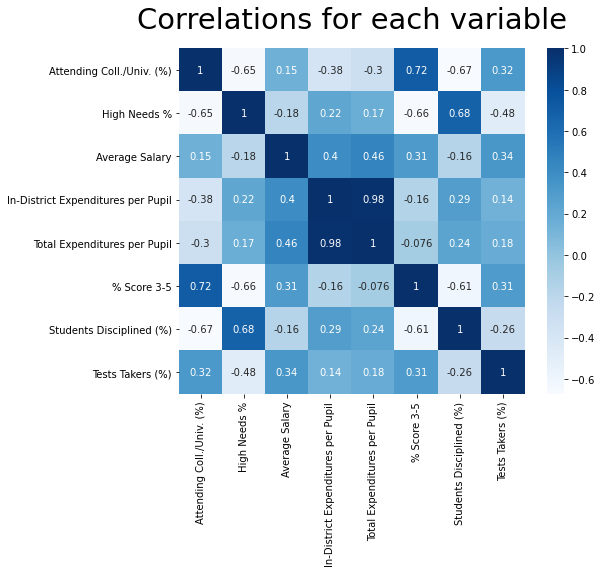

In [100]:
# Display a heatmap showing the correlation between variables
import matplotlib.pyplot as plt
import seaborn as sns

# create a new figure
plt.figure(figsize=(8, 8))
# create a heatmap with our df
ax = sns.heatmap(df.corr(), square=True, annot=True, cmap="Blues")
# add a title and format
ax.set_title('Correlations for each variable', fontsize = 29, pad = 20)
plt.subplots_adjust(bottom=0.28)
plt.show()

In this heatmap, we can see a variety of important correlations. First, our target variable (Attending Coll/Univ (%)) has a relatively high positive correlation with the percentage of AP test takers who earned a score between 3 and 5. There is a relatively high negative correlation between our target variable and the % of High Needs students in a district, as well as between the target variable and percent of students disciplined in a district. Our target value had moderate correlation with the rest of our feature variables, with the lowest correlation found with Average Salary. We did not expect this last conclusion, given our assumption that better paid teachers would be more likely to prepare and encourage their students to attend higher education.

Another interesting observation is the high positive correlation between the percentage of High Needs students in a district and percentage of Students Disciplined. There is an extremely high positive correlation between Total Expenditures per Student and In-District Expenditures per Pupil. We suspected this may be the case, as the variables reflect similar funding data, and it solidified our decision not to use both in a machine learning model, as they would be repetitive.

### Visualization 2

Given that the following three variables (% Score 3-5, High Needs %, and Students Disciplined (%)) were the most correlated with our target variable, we wanted to dive deeper into the distribution of this data one by one, in descending order of how high the variable's correlation with the target is. 

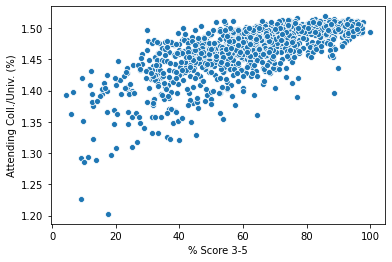

In [97]:
sns.scatterplot(data=df, x="% Score 3-5", y="Attending Coll./Univ. (%)")

By looking at the above scatterplot, it can be discerned that districts where larger portions of students got higher AP test scores had higher rates of students attending higher education. Given that AP courses are typically taught at the same level as college courses, they are often used by universities as a metric of a student's preparedness for college-level material. This correlation was in line with our expectations.

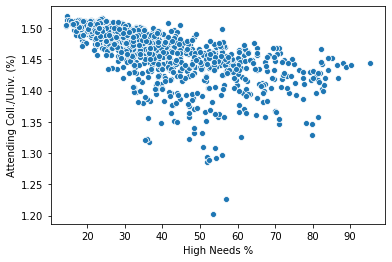

In [98]:
sns.scatterplot(data=df, x="High Needs %", y="Attending Coll./Univ. (%)")

In the above scatterplot, it is clear that higher proportions of High Needs students in a district are correlated with lower higher education attendance rates. This could be for various reasons, one of them being that high needs students often struggle in school and are less likely to have the ability or desire to attend higher ed. Given that, this correlation didn't surprise us much either. 

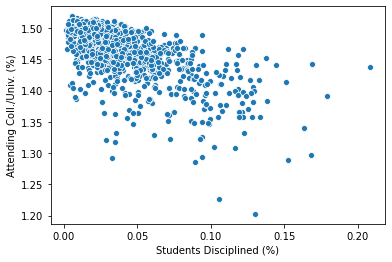

In [99]:
sns.scatterplot(data=df, x="Students Disciplined (%)", y="Attending Coll./Univ. (%)")

In our last correlation plot above, we see that there is an (admittedly less stark) negative correlation between the portion of students disciplined and higher education rate. Students in districts where more disciplinary action is taken seem to be less likely to attend higher education. Perhaps this is because their disciplinary record makes it more difficult for them to get into college, or maybe it is because they have had poor experiences with education and do not have a desire to attend more school. 

### Visualization 3

In addition to analyzing access to higher education, we wanted to better understand the relationship between race and the rate of students disciplined. There is a lot of discussion in the educational community about how Black and Brown students are disciplined more often and harshly than White students, and we wanted to see if our data reflected that. 

As written by the <a href='https://ra.nea.org/business-item/2016-pol-e01-2/#:~:text=School%2Dto%2DPrison%20Pipeline%20means,and%20surveillance%20that%20create%20prison%2D'>National Education Association</a>: "The school-to-prison pipeline disproportionately places students of color, including those who identify as LGBTQ, have disabilities, and/or are English Language Learners, into the criminal justice system for minor school infractions and disciplinary matters, subjecting them to harsher punishments than their white peers for the same behaviors. The school-to-prison pipeline diminishes their educational opportunities and life trajectories."

Below is a heatmap that represents the correlation between racial makeup of a school, percentage of students disciplined, and percentage of students who attend college or university. 

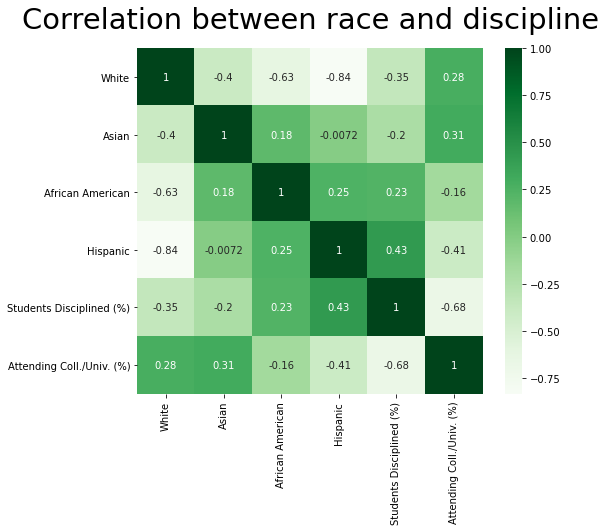

In [101]:
df_for_analysis["Students Disciplined (%)"] = df_for_analysis["Students Disciplined"] / df_for_analysis["Students"]
df_for_analysis["Tests Takers (%)"] = df_for_analysis["Tests Takers"] / df_for_analysis["Students"]

# make a smaller df to base this heatmap off of
race_disc_df = df_for_analysis[["White", "Asian", "African American", "Hispanic", "Students Disciplined (%)", "Attending Coll./Univ. (%)"]]

# create figure
plt.figure(figsize=(8, 8))
# make heatmap
ax = sns.heatmap(race_disc_df.corr(), square=True, annot=True, cmap="Greens")
#add title and format
ax.set_title('Correlation between race and discipline', fontsize = 29, pad = 20)
plt.subplots_adjust(bottom=0.28)
plt.show()

While this heatmap doesn't show a drastically high positive correlation between percentage of students disciplined and percentage of Black and Brown students in a district, it certainly shows some positive correlation. Districts with higher proportions of White and Asian students are shown here to be likely to have lower percentages of students disciplined and higher percentages of students who attend college or university. Conversely, districts with higher proportions of African American and Hispanic students were likely to see higher disciplinary rates and lower rates of students attending college or university. 

## 3.3. Model Construction

#### Defining the Estimators

We will be applying the Multiple Linear Regression, Ridge, Lasso, k-Nearest Neighbor, and Support Vector Machine algorithms. Below we are building a dictionary of them for later use.

In [72]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR


estimators = {'Multiple Linear Regression': LinearRegression(), 'Ridge': Ridge(), 'Lasso': Lasso(), 
              'k-Nearest Neighbor': KNeighborsRegressor(), 'Support Vector Machine': LinearSVR(max_iter = 1000000)}

#### Training the Models
The training_models function fits the selected data from 3.1 to every model in a dictionary to train the models.

In [73]:
def training_models(models_dict):
    """Takes in a dictionary of models and fits the selected data to each of them. Returns
    a dictionary of the fitted models."""
    trained_models = {}

    # for each model in the given dictionary of models
    for name in models_dict:
        # fit the selected data to the model
        model = models_dict[name].fit(X=X_train_selected, y=y_train)
        # store the fitted model
        trained_models[name] = model
        
    return trained_models

In [74]:
trained_models = training_models(estimators)

#### One-way ANOVA/Hypothesis Testing

In [75]:
df_anova = df.copy()
df_anova['High Needs %'] = df_anova['High Needs %'] / 100

In [76]:
#ANOVA function to tests hypotheses 1 and 2
from scipy import stats

def get_onewayANOVA(df, feature1, feature2):
    
    df1 = 1
    df2 = len(feature1)-1
    
    f_results = stats.f_oneway(df[feature1], df[feature2])

    f_stat = format(f_results[0],".02f") #pulls/formats f stat from one way
    p_val = format(f_results[1], ".04f") #pulls/formats p val from one way
    
    print("F(%s,%s) = %s, p = %s" % (df1, df2, f_stat, p_val)) #ftest report
    
    
    descr1 = df[feature1].agg(["mean", "sem"])
    print(feature1, "mean:", round(descr1[0],100), "\nMSE:", round(descr1[1],4))
    descr2 = df[feature2].agg(["mean", "sem"])
    
    print(feature2, "mean:", round(descr2[0],100), "\nMSE:", round(descr2[1],4))

Testing hypothesis 1: Running an ANOVA between Students Disciplined (%) and High Needs (%)

In [77]:
get_onewayANOVA(df, 'Students Disciplined (%)', 'High Needs %')

F(1,23) = 6715.07, p = 0.0000
Students Disciplined (%) mean: 0.036821062387797594 
MSE: 0.0009
High Needs % mean: 37.57666098807489 
MSE: 0.4581


Testing hypothesis 2: Running an ANOVA between Students Disciplined (%) and Tests Takers (%)

In [78]:
get_onewayANOVA(df, 'Students Disciplined (%)', 'Tests Takers (%)')

F(1,23) = 361.28, p = 0.0000
Students Disciplined (%) mean: 0.036821062387797594 
MSE: 0.0009
Tests Takers (%) mean: 0.06346464893905682 
MSE: 0.0011


## 3.4. Model Evaluation

#### Evaluation Metrics
In the below section, we are going to find the performance of the trained models on two appropriate evaluation metrics.

The two metrics:
1. **R-squared value**: This metric is the coefficient determination. It ranges from 1.0, meaning the model perfectly predicts the DV's value given IV values, to 0.0, meaning the model cannot make predictions with any accuracy.
2. **Mean squared error value**: This metric is the average of the square of errors where the error is the difference between the observed and predicted values. This value ranges from 1.0 to 0.0 and the closer the value is to 0.0, the closer the fit is to the data.

In [79]:
def evaluating_models(models_dict):
    """Takes in a dictionary of fitted models and outputs a textual overview of each model's
    R-squared and MSE value for the training and testing sets."""
    
    # for each model in the given dictionary of fitted models
    for name in models_dict:
        model = models_dict[name]
        print(name + ":")
        # R-squared values
        print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
        print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))
        # MSE values
        print("\tMean squared error value for training set: ", mean_squared_error(y_train, model.predict(X_train_selected)))
        print("\tMean squared error value for testing set: ", mean_squared_error(y_test, model.predict(X_test_selected)),"\n")

#### Results of the Evaluation Metrics

In [80]:
evaluating_models(trained_models)

Multiple Linear Regression:
	R-squared value for training set:  0.6666464074889842
	R-squared value for testing set:  0.6620303285211429
	Mean squared error value for training set:  0.010010025650266745
	Mean squared error value for testing set:  0.008933330532852987 

Ridge:
	R-squared value for training set:  0.6661290013808893
	R-squared value for testing set:  0.6646419822798739
	Mean squared error value for training set:  0.010025562451219215
	Mean squared error value for testing set:  0.008864298402952029 

Lasso:
	R-squared value for training set:  0.0
	R-squared value for testing set:  -0.0002592681257347351
	Mean squared error value for training set:  0.03002825190772755
	Mean squared error value for testing set:  0.02643919681200095 

k-Nearest Neighbor:
	R-squared value for training set:  0.8202295177564348
	R-squared value for testing set:  0.6923886464064757
	Mean squared error value for training set:  0.005398193326383438
	Mean squared error value for testing set:  0.0081

**Interpretation:**
Three of our five models had similar, positive performances on the testing sets. Below we will discuss our findings with a focus on ranking performance based on the training set values.

The k-Nearest Neighbor algorithm scored the best, with a R-squared value of 0.6924 and a Mean Squared Error value of 0.00813. This means that the k-Nearest Neighbors algorithm can account for about 69.24% of the variation in the regression model and has an average squared error of 0.00813. The MSE value specifically indicates that there is a smaller, or often lower, amount of error in the model since this estimator is sensitive to larger error values.

Following behind k-Nearest Neighbors, the Multiple Linear Regression and Ridge algorithms have R-squared values of 0.6620 and 0.6646 and Mean Squared Error values of 0.00893 and 0.00886 respectively. Both algorithms had extremely close values and scored close to the top performing algorithm- only about 3% below the R-squared and about .0005 above the Mean Squared Error. 

Just slightly below in performance lies the Support Vector Machine algorithm with an R-squared value of 0.6558 and a Mean Squared Error value of .00909. These scores are still close to our top performing algorithms but, due to the very close values already between our second two algorithms, we will not continuing with this algorithm.

The Lasso Regression had a performance resulting in little to no viable results. While poor performance values can sometimes still be valuable, on our model the Lasso Regression algorithm resulted in an approximately 0 R-squared value with the R-squared value on the training set being actually 0. The Mean Squared Error value follows with the poor score of 0.02644. These results were very significant and showed Lasso Regression was a very poor algorithm for our model.

We chose to continue with the three top performing algorithms: Multiple Linear Regression, Ridge, and k-Nearest Neighbor. We hope to see how tuning might affect the closeness of scores for the second two performing algorithms and how it might reduce the noticable overfitting to the training set by the k-Nearest Neighbors algorithm.

In [81]:
chosen_estimators = {'Multiple Linear Regression': LinearRegression(), 'Ridge': Ridge(), 'k-Nearest Neighbor': KNeighborsRegressor()}

### 3.5. Model Optimization

#### Grid Search Function
This function will be used to tune models using the appropriate hyperparameters.

In [85]:
from sklearn.model_selection import GridSearchCV

def grid_search_params(params, model):
    """Takes in a single model and parameters to test in order to tune the
    given model, using the selected training data from 3.1. Returns the
    grid_search model for later use in testing."""
        
    # Grid search with the given parameters and a cross validation amount of 5
    grid_search = GridSearchCV(model,params,cv=5)
    # fits to the training data selected in 3.1
    grid_search.fit(X=X_train_selected, y=y_train)
    
    # outputs results
    print("\tBest parameters:", grid_search.best_params_)
    print("\tBest cross-validation score:", grid_search.best_score_)
    
    return grid_search.best_estimator_

#### Creating Params
Below is an overview of which parameters we will be tuning and an overview of our motive

>**Multiple Linear Regression**:
>We are not going to be creating parameters or hypertuning the Multiple Linear Regression model. This tuning for this model mostly depends on needing our data to be normalized, something that was covered when we preprocessed and feature selected our data.

>**Ridge**:
>We are going to tune the alpha value for our ridge model in order to determine if the model would benefit from reducing either under or overfitting to the data. The alpha value was originally 1 and we are testing values between 0 and 2. An alpha value lower than 1 would avoid overfitting and reduce the model's complexity while an alpha value over 1 would avoid underfitting and increase the model's complexity.

>**k-Nearest Neighbor**:
>One of the two parameters we are going to hypertune for the model is the metric of the model. The metric of the model is the distance metric used for the tree. The default is minkowski but we will also be trying out euclidean, manhattan, and chebyshev. If one of these other metrics is selected, we will discuss the difference in how the new distance metric works.
>
>The other parameter we will hypertune is the n_neighbors value. The default for this value is 5. A higher n_neighbors value would avoid overfitting and reduce the model's complexity while a lower n_neighbors value would avoid underfitting and increase the model's complexity.

In [86]:
from scipy.stats import uniform
# creating 100 alpha values to test from 0 to 2
alphas = uniform.rvs(0,2,size=100,random_state=3000)

# creating the Ridge parameters
ridge_params = {"alpha":alphas}

# creating the k-Nearest Neighbors parameters
kn_params = {"n_neighbors":[1,2,3,4,5,6,7,8,9],
             "metric":["euclidean", "manhattan", "chebyshev", "minkowski"]}

#### Model Optimization Results

In [87]:
print("Ridge:")
ridge_grid = grid_search_params(ridge_params,chosen_estimators["Ridge"])
print("\nk-Nearest Neighbor:")
kn_grid = grid_search_params(kn_params,chosen_estimators["k-Nearest Neighbor"])
print("\nMultiple Linear Regression (not tuned):")
ml_grid = grid_search_params({},chosen_estimators["Multiple Linear Regression"])

Ridge:
	Best parameters: {'alpha': 0.9267214360227443}
	Best cross-validation score: 0.6540130424566305

k-Nearest Neighbor:
	Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
	Best cross-validation score: 0.7250319495111042

Multiple Linear Regression (not tuned):
	Best parameters: {}
	Best cross-validation score: 0.6532230496919171


**Ridge**: Our tuned alpha ended up being slightly lowered from the original value of 1, meaning that hypertuning our Ridge model is for the goal of avoiding overfitting our model, though with very little affect.

**k-Nearest Neighbor**: Our n_neighbors value stayed optimal at 5 so there was no change to that in the model. Our improved metric ended up being manhattan instead of minkowski. The original minkowski distance metric follows the distance function sum(|x - y|^p)^(1/p) while the manhattan distance metric follows the distance function sum(|x - y|). The manhattan distance metric being chosen means that our hypertuning of the k-Nearest Neighbor model has simplified the model, though it is unlikely this alone will have solved the overfitting by the algorithm.

### 3.6. Model Testing

#### Recreating the Models
Using the grid search best estimator models in section 3.5, we have created a dictionary of our three top performing models.

In [88]:
tuned_models = {'Multiple Linear Regression': ml_grid, 'Ridge': ridge_grid, 'k-Nearest Neighbor': kn_grid}

#### Testing the Models
To create our final results, we are going to take our tuned models, train them using the function in 3.3, and test them using the function in 3.4. 

In [89]:
fitted_tuned_models = training_models(tuned_models)
evaluating_models(fitted_tuned_models)

Multiple Linear Regression:
	R-squared value for training set:  0.6666464074889842
	R-squared value for testing set:  0.6620303285211429
	Mean squared error value for training set:  0.010010025650266745
	Mean squared error value for testing set:  0.008933330532852987 

Ridge:
	R-squared value for training set:  0.6661958576949683
	R-squared value for testing set:  0.6644948030956868
	Mean squared error value for training set:  0.010023554872978428
	Mean squared error value for testing set:  0.008868188693740984 

k-Nearest Neighbor:
	R-squared value for training set:  0.8264267002746902
	R-squared value for testing set:  0.7107515461181713
	Mean squared error value for training set:  0.0052121027686070995
	Mean squared error value for testing set:  0.007645514561518008 



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

#### Summary of our Work

We began by taking time to clean and alter our large dataset in 3.1. Our dataframe was changed by dropping columns that would negatively impact the ability of our machine learning algorithms- most notably many directly correlated columns- and was then cleaned and transformed into numerical values for use.

We analyzed both the original dataset and our dataframe for machine learning with 3 visualizations in 3.2.

We analyzed feature and target correlations in 3.3 and trained our models.

3.4 covered model evaluations and ended with us selecting the top 3 models to continue with in sections 3.5 and 3.6.

In 3.5 we tuned the 3 models we had chosen and subsequently tested the tuned models in section 3.6. Performance after hypertuning resulted in almost no change in the Ridge algorithm but had a small but noticeable improvement on the k-Nearest Neighbors algorithm.

#### Algorithms Compared:
We compared Multiple Linear, Ridge, Lasso, k-Nearest Neighbors, and Support Vector Machine regression algorithms

#### Best Algorithm Performances:
Multiple Linear Regression Algorithm  
R-squared testing value: 0.6620303285211429
Mean Squared Error testing value: 0.008933330532852987

Ridge Algorithm  
R-squared testing value: 0.6644948030956868
Mean Squared Error testing value: 0.008868188693740984

#### Final Performance of the Second Best Algorithm:
k-Nearest Neighbor Algorithm  
R-squared testing value: 0.7107515461181713
Mean Squared Error testing value: 0.007645514561518008

#### The Algorithm for our Predictive Model:
Although we continued with Multiple Linear, Ridge, and k-Nearest Neighbors models, the algorithm we recommend to be used for our predictive model is the Ridge Algorithm.  

Originally, we continued with more than 1 model to account for their closeness in value and the potential for them to change in ranking after hyperparameter tuning. We wanted to continue with more than 1 top model to see how tuning might change their testing results and that- along with the incredible closeness of our Multiple Linear Regression and Ridge algorithms- led us to the decision to continue with all 3.  

In the end, hyperparameter tuning ended up most positively affecting the k-Nearest Neighbor algorithm but still could not reduce the overfitting to the training data enough for us to consider it as the algorithm to use for our predictive model.

Although incredibly close in value, we decided that the Ridge algorithm was the best model to use for our predictive model. Its slight lead over the Multiple Linear Regression performance and our use of hypertuning on the model were two factors that helped us decide on this algorithm.

#### Does the Model Work:
We can not use the features in our dataset to predict the outcome variable we identified using the algorithms we've applied. There is not enough security in the algorithm we have fine tuned to actually use our predictive model as intended. Although our model would make a good tool to explore and understand the factors that result in attendance of higher education by MA students, it is not accurate enough to be used as a predictive tool.  

#### Hypotheses Results:
   - Hypothesis 1: Relation between 'Students Disciplined' and 'High Needs'
       - H0: There is no difference between the 'Students Disciplined %' and 'High Needs %' features on the target variable (percent of students attending college or university). 
       - Ha: There is a statistically significant difference between the 'Students Disciplined %' and 'High Needs %' features on the target variable (percent of students attending college or university). 
     - Evaluation: Results revealed a statistically significant difference between these two variables, with F(1,23) = 6715.07 and a p value less than 0.0001. We therefore can reject the null hypothesis. 
   - Hypothesis 2: Relation between 'Students Disciplined' and 'Tests Takers'
       - Null: There is no difference between the 'Students Disciplined %' and 'Test Taker %' features on the target variable (percent of students attending college or university). 
       - Alternative: There is a statistically significant difference between the 'Students Disciplined %' and 'Test Taker %' features on the target variable (percent of students attending college or university).
     - Evaluation:Results revealed no statistically significant difference between these two variables, with F(1,23) = 361.28 and a p value less than 0.0001. We therefore can reject the null hypothesis. 
   - Hypothesis 3: Lasso Regression
       - Null: There will be no significant difference between the accuracy predictions of any of the Lasso Model in comparison to the regression models that we use.
       - Alternative: Out of all of the regression models that we use, the Lasso regression model will have the highest accuracy.
     - Evaluation: The Lasso regression had a surprisingly poor performance value in our model. The R-Squared value on both the testing and training sets were approximately 0, indicating a lower accuracy with the Lasso regression than any other model used. Thus, we can reject the null hypothesis. We must also reject our original alternative hypothesis, as the end result was that the Lasso regression model resulted in the lowest accuracy out of all regression models used. 


#### Conclusion:

paragraph

#### Future Work:

We would love to continue exploring the issue of access to higher education in Massachusetts. One of our ideas is to collect data about the communities school districts are in and compare that with rates of students attending higher education. For example, can you better predict access to higher education based on a community's average income, average property value, or average number of people living in a home? For data exploration purposes, it would be interesting to break down the Attending Coll./Univ. variable even further, looking at what percentage of students went to community colleges, public colleges, and private institutions. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Much of our work was done collaboratively over Zoom, with one person sharing their screen and all of us working through the code together. While each of us played some role in every portion of the report, below is a more detailed breakdown of who spearheaded which sections:

Ysabelle wrote much of the written portions of the project, especially in the introduction. She also completed the Data Exploration section, creating visualizations and drawing insights from them. 

Abby led us through the Data Wrangling and Model Construction portions of the report, taking the initiative to share her screen as we worked through those sections. She also helped draft up much of the written discussion about the performance of our ML models. 

Reshan completed a large part of the Method section and worked on our hypotheses tests, as well as spent a significant amount of time working with Abby on model construction.